# TaxiCab - Analysis and Visualizations

For this challenge, I perform the data importing, wrangling, cleaning, merging and the exploratory data analysis right here in this notebook file using Python. At the end, the cleaned dataset is then opened using Tableau for performing various visualizations for deriving insights and achieving the given objectives and more!

For the challenge, I have attached this jupyter notebook file and the tableau workbook file and the datasets which I imported along with the dataset that I have generated after cleaning.

## Contents:

<a href=#bookmark1>Data Importing</a>
<br>
<a href=#bookmark2>Data Cleaning</a>
<br>
<a href=#bookmark3>Exploratory Data Analysis</a>
<br>
<a href=#bookmark4>Data Exporting</a>

### Data Importing <a name='bookmark1' />

I begin with importing the necessary packages:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

sns.set(rc={'figure.figsize':(11.7,8.27)})

I read the json file into a pandas dataframe df:

In [2]:
df = pd.read_json('surcharge_data.json', convert_axes=False)
df

,559893529209,993405808080,267031741304,355132875433,603494714228,796431455521,292429735915,723218812491,707163995392,762316622020,...,340606840492,727563688853,415155748717,206295159590,615323074645,204125243754,511527970247,795487851532,550977006601,244977907136
improvement_surcharge,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,...,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3
congestion_surcharge,2.5,0.0,0.0,0.0,2.5,2.5,0.0,2.5,0.0,2.5,...,2.5,0.0,0.0,2.5,2.5,0.0,0.0,0.0,0.0,0.0


I also read the main csv file into a pandas dataframe df1:

In [3]:
df1 = pd.read_csv("yellow_tripdata_2021-01_raw_updated.csv", low_memory=False)

Since the read json file dataframe is inverted, I transpose it to get the desired structure:

### Data Cleaning <a name='bookmark2' />

In [4]:
df = df.T
df = df.reset_index(names=['tripId']) #resetting the index column

Checking the datatypes before proceeding:

In [5]:
df.dtypes

tripId                    object
improvement_surcharge    float64
congestion_surcharge     float64
dtype: object

In [6]:
df = df.astype({'tripId': 'int64'}) #changing the data type of the unique identifier into int64

Checking the distinct values in both the surcharge columns:

In [7]:
df.improvement_surcharge.value_counts()

 0.3    1362453
-0.3       6654
 0.0        658
Name: improvement_surcharge, dtype: int64

In [8]:
df.congestion_surcharge.value_counts()

 2.50    1164917
 0.00     199345
-2.50       5497
 0.75          5
 3.00          1
Name: congestion_surcharge, dtype: int64

Negative values which are anomalies exist here which are probably typing errors which will need to be addressed. Also, checking if the dataset has any null values:

In [9]:
df.isna().sum().sum()

0

We do not have any null values. First, I round up the columns so that the float data type doesn't cause any precision issues:

In [10]:
df = df.round({'improvement_surcharge': 1, 'congestion_surcharge': 2})

Then I find and replace the input anomalies with the correct corresponding values:

In [11]:
df.improvement_surcharge = df.improvement_surcharge.replace(to_replace=[-0.3], value=0.3)
df.congestion_surcharge = df.congestion_surcharge.replace(to_replace=[-2.50], value=2.50)

Coming back to our main csv file, a little glimpse into the different columns:

In [12]:
df1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,tripId
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.1,1.0,N,142,43,2.0,8.0,3.0,0.5,0.00,0.0,559893529209
1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.2,1.0,N,238,151,2.0,3.0,0.5,0.5,0.00,0.0,993405808080
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.7,1.0,N,132,165,1.0,42.0,0.5,0.5,8.65,0.0,267031741304
3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.6,1.0,N,138,132,1.0,29.0,0.5,0.5,6.05,0.0,355132875433
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1.0,16.5,0.5,0.5,4.06,0.0,603494714228


Now that both the dataframes are in the correct shape, I merge them with an inner join on the tripId column into a single dataframe **ff**:

In [13]:
ff = pd.merge(left=df1, right=df, left_on='tripId', right_on='tripId')

Checking the data types of all the columns in the combined final dataset:

In [14]:
ff.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance             object
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
tripId                     int64
improvement_surcharge    float64
congestion_surcharge     float64
dtype: object

Now, checking back from the yellow taxi meta data files, only two officially recognised vendors are listed - Creative Mobile Technologies, LLC, corresponding to the number 1 and, VeriFone Inc., corresponding to the number 2:

In [15]:
ff = ff[(ff["VendorID"] == 1.0) | (ff["VendorID"] == 2.0)]

Changing the data types of various columns to make the processing more efficient and informative:

In [16]:
ff = ff.astype({'VendorID': 'str'})
ff = ff.astype({'passenger_count': 'int64'})
ff = ff.astype({'trip_distance': 'str'})

Using value_counts() method on the trip_distance column, I found out that the column contains mixed values and is not fully numeric, as it should be. Many rows consisted of the suffix **'km'** trailing at the end which needed to be removed.
Removing the suffix and fixing the entire column into the proper format:

In [17]:
ff1 = ff[ff['trip_distance'].str.contains('km')] #getting a subset of all the rows where the field contains the suffix 'km'
ff1['trip_distance'] = ff1['trip_distance'].str[:-2] #cutting out the last two digits of all the rows with the suffix 'km'
ff2 = ff[~ff['trip_distance'].str.contains('km')] #getting a subset of all the other rows from the original dataframe

After the two split and fixed dataframe **ff1** and **ff2** are obtained, I appended them together to get back the fixed and consolidated dataframe **ff** again:

In [18]:
ff = ff2.append(ff1, ignore_index=True)

Changing the data types of some columns again:

In [19]:
ff = ff.astype({'trip_distance': 'float64'})
ff = ff.astype({'payment_type': 'str'})

Using value_counts() method on the RatecodeID column, we see that it contains some rows with values extremely high and also not specified in the metadata file. These rows are anomalous in nature and only contributed to considerably lower numbers and hence I dropped them as it would not affect any analysis:

In [20]:
ff = ff[ff.RatecodeID != 99.0]
ff = ff.astype({'RatecodeID': 'int64'})

Also while exploring around the other columns, I found out that various amount columns specified below contained negative values in place of positive values, which are mistakes, as fare amounts can never be negative. Fixing all those columns by calculating their absolute values:

In [21]:
ff['fare_amount'] = ff['fare_amount'].abs()
ff['extra'] = ff['extra'].abs()
ff['mta_tax'] = ff['mta_tax'].abs()
ff['tip_amount'] = ff['tip_amount'].abs()
ff['tolls_amount'] = ff['tolls_amount'].abs()

Now that I have various fare and other charges columns, I add them all up to create a new column called the **total_amount** which sums up the fare amount, the taxes, toll amounts and the various surcharges:

In [22]:
ff['total_amount'] = ff.fare_amount + ff.extra + ff.mta_tax + ff.tip_amount + ff.tolls_amount + ff.improvement_surcharge + ff.congestion_surcharge

Removing and placing the tripID column at the beginning as it is an unique row identifier:

In [23]:
tripId = ff.pop('tripId')
ff.insert(0, 'tripId', tripId)

Resetting the dataframe index after the various data wrangling operations:

In [24]:
ff.reset_index(inplace=True, drop=True)

I noticed that I have both the pickup and drop off times. So I decided to calculate the trip duration, which is esentially the drop off time minus the pickup time. Various operations were done to ensure that the columns were in the correct datetime formats and the resulting time delta columns is extracted as seconds and then converted into minutes, denoting the trip duration in minutes:

In [25]:
ff['tpep_pickup_datetime'] =  pd.to_datetime(ff['tpep_pickup_datetime'], format='%Y-%m-%d')
ff['tpep_dropoff_datetime'] =  pd.to_datetime(ff['tpep_dropoff_datetime'], format='%Y-%m-%d')

b = ff['tpep_dropoff_datetime'] - ff['tpep_pickup_datetime']
b = pd.to_timedelta(b)

c = []
for i in range(len(b)):
    c.append(b[i].seconds)
    
d = []
for i in range(len(c)):
    d.append(round(c[i]/60,2))
    
ff.insert(4, 'trip_duration(in minutes)', d) #appending the new column 'trip_duration(in minutes)' to the dataframe

Also, since we are working with only the records from **January 2021**, the various datetime records are checked and then filtered to contain only the year **2021** and only the month **January**:

In [26]:
ff['year1'] = ff['tpep_pickup_datetime'].dt.year
ff = ff[ff.year1 == 2021]

ff['year2'] = ff['tpep_dropoff_datetime'].dt.year 
ff = ff[ff.year2 == 2021]

ff = ff.drop(['year1', 'year2'], axis=1)

In [27]:
ff['month1'] = ff['tpep_pickup_datetime'].dt.month
ff = ff[ff.month1 == 1]

ff['month2'] = ff['tpep_dropoff_datetime'].dt.month
ff = ff[ff.month2 == 1]

ff = ff.drop(['month1', 'month2'], axis=1)

Finally, checking the entire dataframe for any missing values which would needed to be fixed:

In [28]:
ff.isna().sum().sum()

0

A small sample of the final cleaned and processed dataframe:

In [29]:
ff.head()

,tripId,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,trip_duration(in minutes),passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount
0,559893529209,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,6.03,1,2.10,1,N,142,43,2.0,8.0,3.0,0.5,0.00,0.0,0.3,2.5,14.30
1,993405808080,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,0.98,1,0.20,1,N,238,151,2.0,3.0,0.5,0.5,0.00,0.0,0.3,0.0,4.30
2,267031741304,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,27.60,1,14.70,1,N,132,165,1.0,42.0,0.5,0.5,8.65,0.0,0.3,0.0,51.95
3,355132875433,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,15.22,0,10.60,1,N,138,132,1.0,29.0,0.5,0.5,6.05,0.0,0.3,0.0,36.35
4,603494714228,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,16.53,1,4.94,1,N,68,33,1.0,16.5,0.5,0.5,4.06,0.0,0.3,2.5,24.36


### Exploratory Data Analysis: <a name='bookmark3' />

A box plot of the **trip_distance** column revealed that I have a single anomalous record which is obviously an input error:

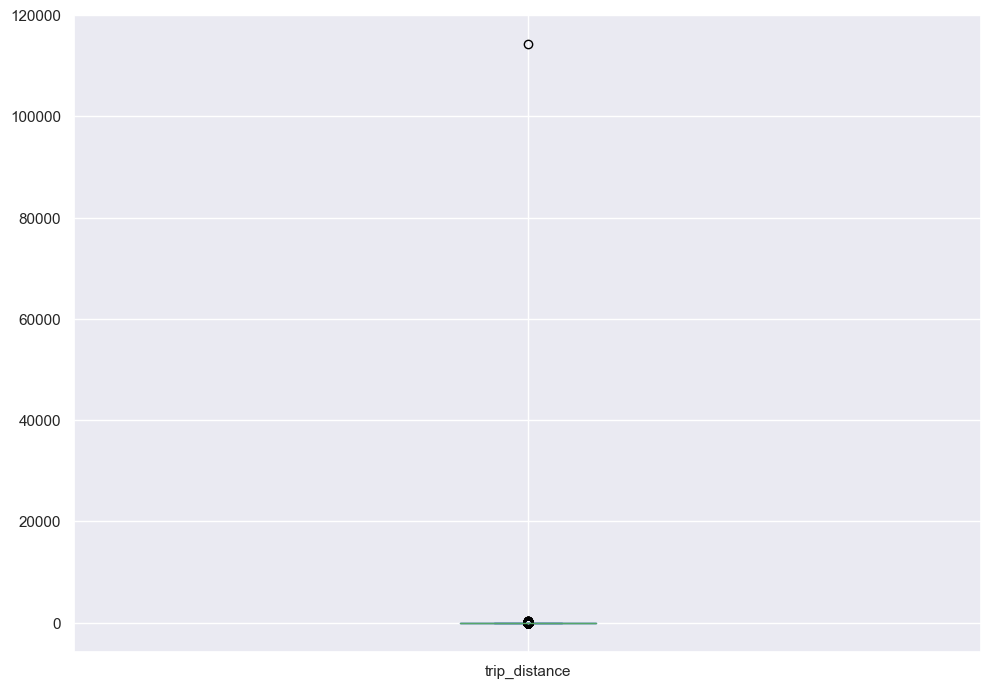

In [30]:
ff[['trip_distance']].plot.box();

In [31]:
ff = ff[ff.trip_distance < 10000]

The obvious outlier is removed to make the EDA more effective and to provide more meaningful results and the resulting boxplot is shown again:

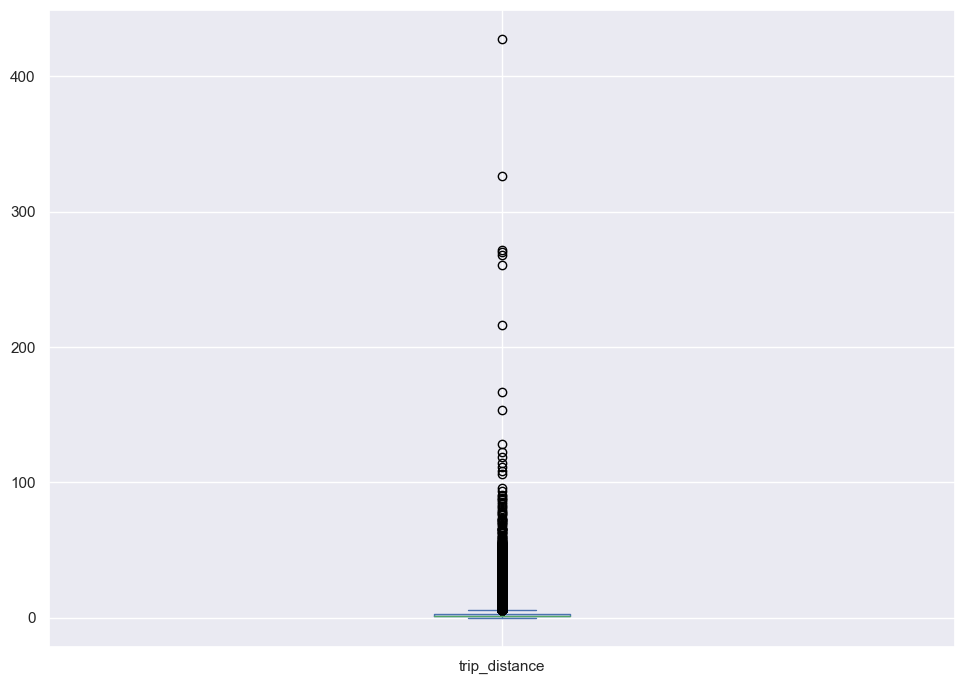

In [32]:
ff[['trip_distance']].plot.box();

A boxplot of the **total_amount** column is created:

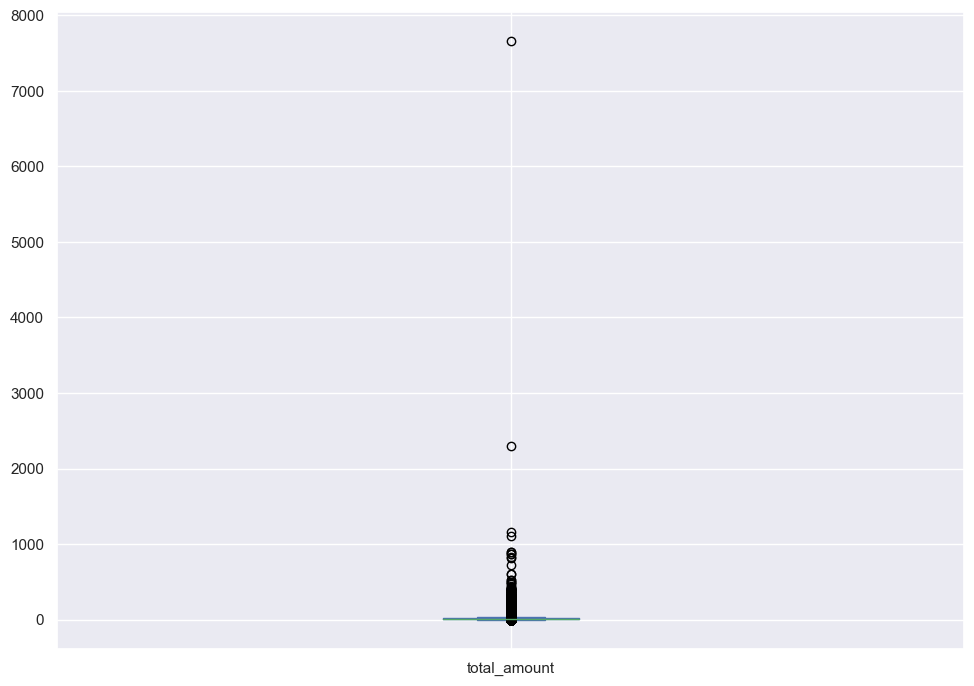

In [33]:
ff[['total_amount']].plot.box();

There seem to be two obvious outliers, but I don't want to simply remove them without checking the corresponding records first:

In [34]:
ff.loc[ff['total_amount'] > 2000]

,tripId,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,trip_duration(in minutes),passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,total_amount
107624,687192236323,2.0,2021-01-04 16:04:51,2021-01-04 16:15:01,10.17,1,2.05,1,N,140,236,1.0,6960.5,1.0,0.5,696.48,0.00,0.3,2.5,7661.28
1269196,724435950946,1.0,2021-01-20 11:22:05,2021-01-20 19:47:56,505.85,1,427.70,1,Y,4,265,1.0,1128.5,2.5,0.5,1140.44,20.16,0.3,2.5,2294.90


As expected, one of the outliers is an obvious error, where the trip duration is just about 10 minutes, but the total fare adds up to an astounding 7,600 USD. However, the other outlier seems sensible as it is a long trip of about 500 minutes (8.3 hours) and hence the high total fare is justifiable. So I removed just the single obvious anomalous outlier:

In [35]:
ff = ff[ff.total_amount < 3000]

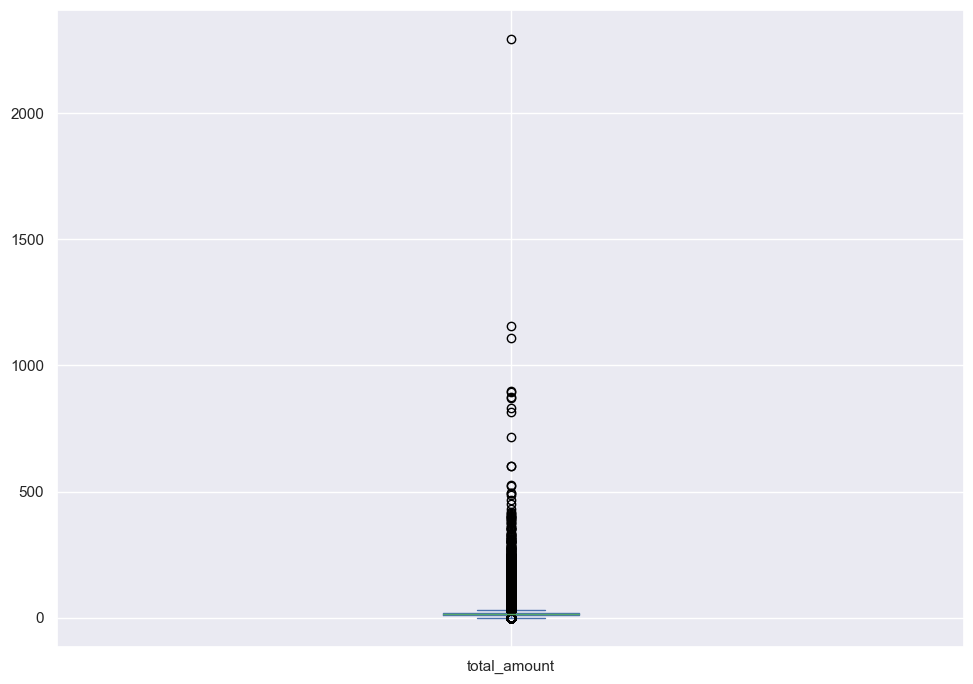

In [36]:
ff[['total_amount']].plot.box();

A correlation plot is also obtained which displays the various correlation values between corresponding numerical variables:

In [37]:
corr = ff[['trip_duration(in minutes)','passenger_count','trip_distance','improvement_surcharge','congestion_surcharge', 'total_amount']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,trip_duration(in minutes),passenger_count,trip_distance,improvement_surcharge,congestion_surcharge,total_amount
trip_duration(in minutes),1.00,0.02,0.12,-0.00,-0.03,0.12
passenger_count,0.02,1.00,0.01,0.00,0.01,-0.01
trip_distance,0.12,0.01,1.00,0.01,-0.23,0.88
improvement_surcharge,-0.00,0.00,0.01,1.00,0.06,0.01
congestion_surcharge,-0.03,0.01,-0.23,0.06,1.00,-0.17
total_amount,0.12,-0.01,0.88,0.01,-0.17,1.00


Not much strong positive or negative relationships can be derived from the obtained correlation plot except for the positive correlation between the **trip_distance** and the **total_amount** variables, which is expected, as the longer the trip duration, the higher the fare amount.

Checking the relationship between the newly created **trip_duration** and the **total_amount** variables:

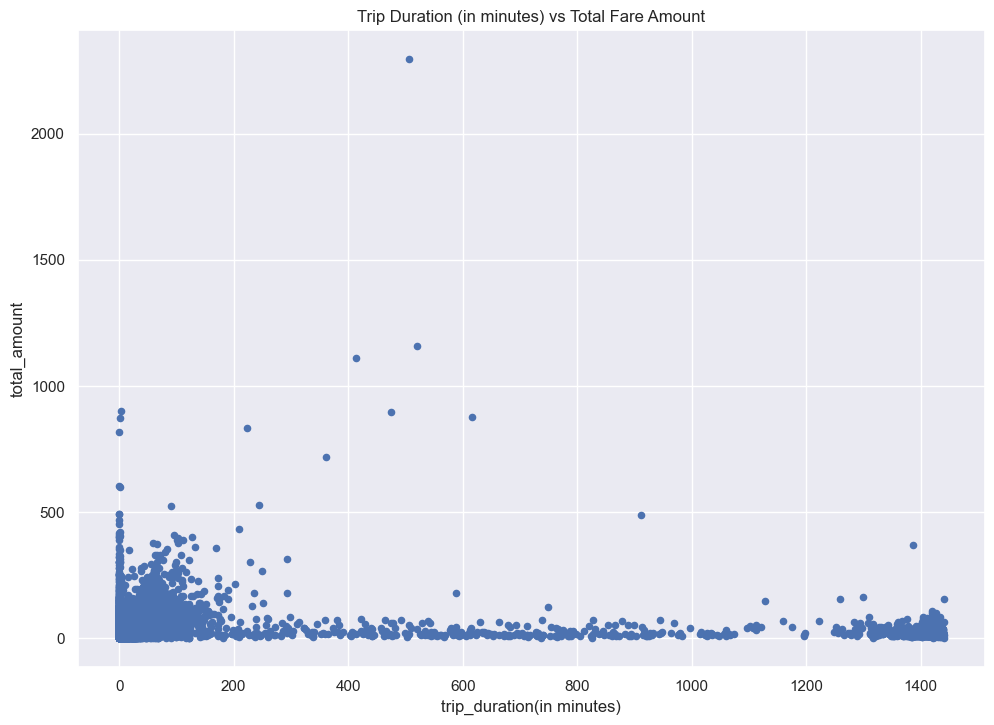

In [38]:
ff.plot.scatter(x = 'trip_duration(in minutes)', y = 'total_amount', title = 'Trip Duration (in minutes) vs Total Fare Amount');

As already inferred from the correlation plot, I once more confirm the positive correlation between the **Trip_distance** column and the **total_amount** column:

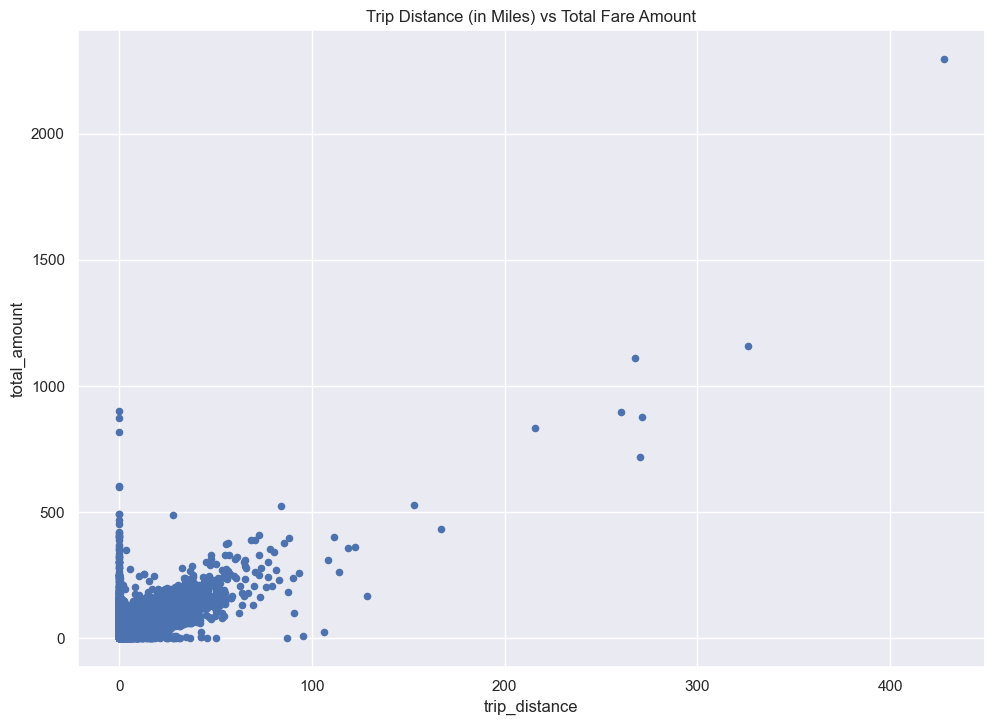

In [39]:
ff.plot.scatter(x = 'trip_distance', y = 'total_amount', title = 'Trip Distance (in Miles) vs Total Fare Amount');

A frequency countplot of the **passenger_count** column is also obtained:

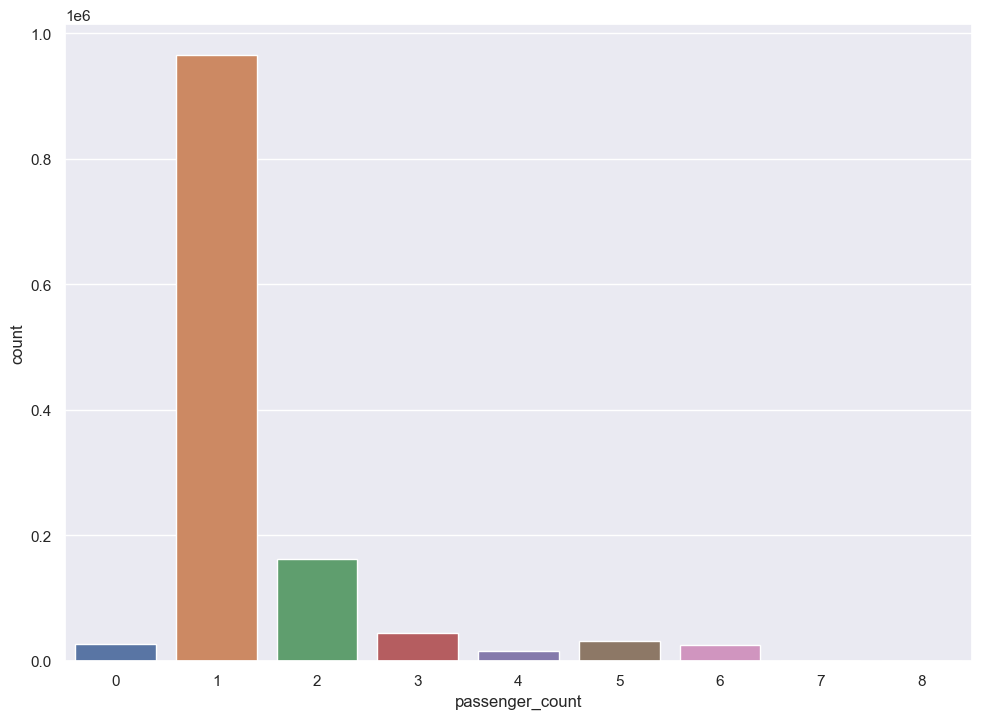

In [40]:
sns.countplot(x ='passenger_count', data = ff);

From the Yellow Taxi Metadata file, the values corresponding to the existing records for the **payment_type** column are replaced and a frequency count plot is obtained which shows that the most prevalent form of payment method is the credit card:

In [41]:
ff.payment_type = ff.payment_type.replace(to_replace=['1.0','2.0','3.0','4.0'], value=['Credit Card','Cash','No Charge','Dispute'])

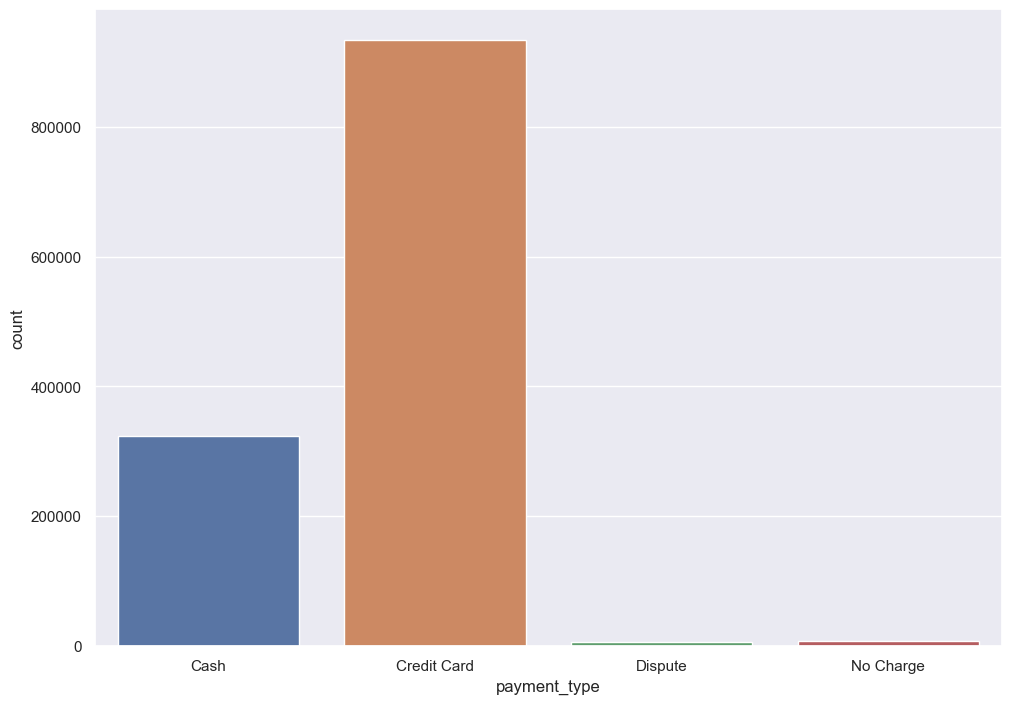

In [42]:
sns.countplot(x ='payment_type', data = ff);

Similarly, from the metadata file, the values corresponding to the existing records for the **VendorID** column are replaced and a corresponding frequency count plot is obtained which shows that VeriFone Inc. has achieved more trips than its counterpart:

In [43]:
ff.VendorID = ff.VendorID.replace(to_replace=['1.0','2.0'], value=['Creative Mobile Technologies, LLC','VeriFone Inc.'])

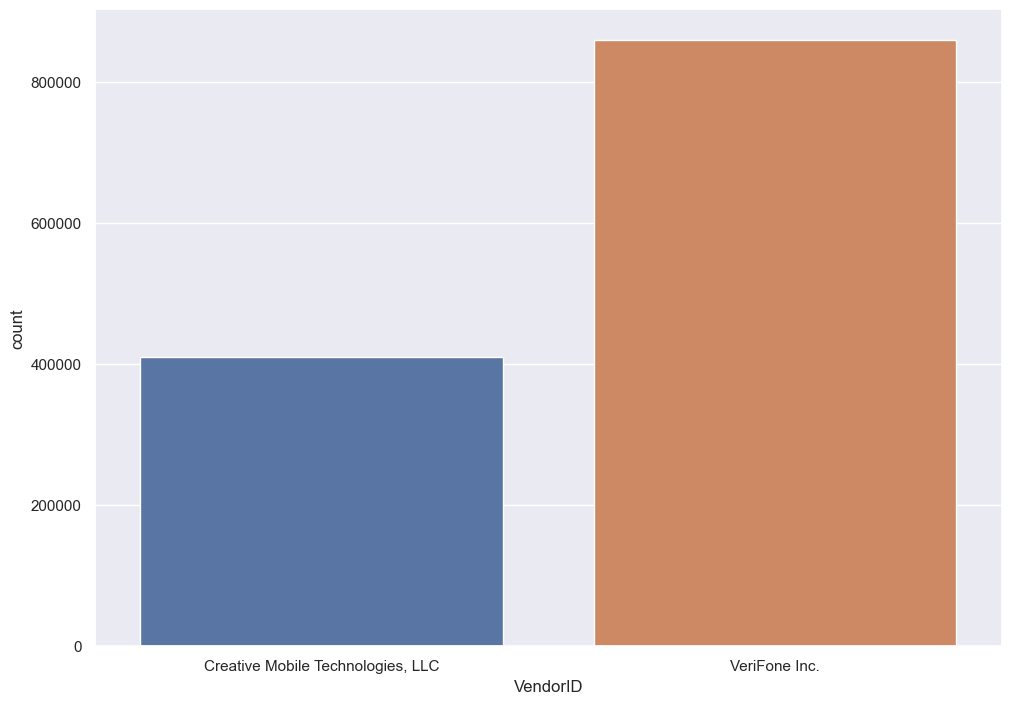

In [44]:
sns.countplot(x ='VendorID', data = ff);

As done above, from the metadata file, the values corresponding to the existing records for the **RatecodeID** column are replaced and a corresponding frequency count plot is obtained which shows that the standard rate applied to majority of the trips:

In [45]:
ff.RatecodeID = ff.RatecodeID.replace(to_replace=[1,2,3,4,5,6], value=['Standard Rate','JFK','Newark','Nassau/Westchester','Negotiated','Group Ride'])

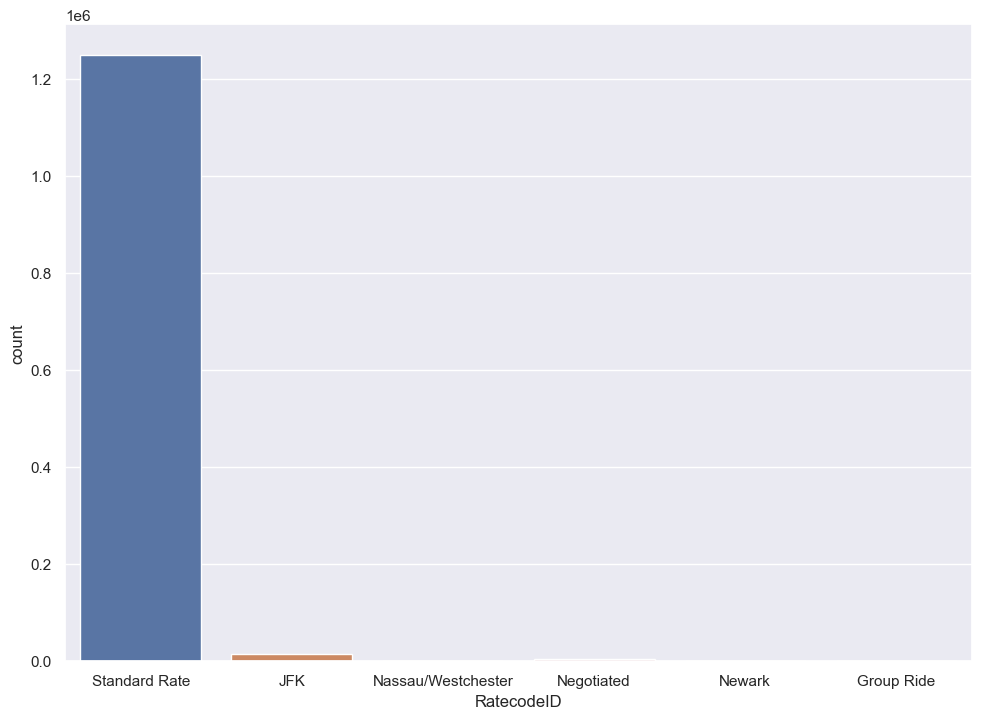

In [46]:
sns.countplot(x ='RatecodeID', data = ff);

As a part of my objective, I was needed to check if there is any relationship between the **congestion_surcharge** and the **trip_distance** columns. After obtaining a correlation plot, it seemed evident that there was no solid relation between the two. However, I explore more on this objective while visualising with Tableau.

In [47]:
corr = ff[['congestion_surcharge', 'trip_distance']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,congestion_surcharge,trip_distance
congestion_surcharge,1.00,-0.23
trip_distance,-0.23,1.00


Resetting the index once again after all the data cleaning and wrangling processes have been completed:

In [48]:
ff.reset_index(inplace=True, drop=True)

### Data Exporting <a name='bookmark4' />

Once the final dataframe is ready to be visualised and worked with on Tableau, I print out the entire dataframe into a csv file named "TaxiCab":

In [49]:
ff.to_csv("TaxiCab.csv", index=False)

Thanks, David Ben Gurion

------